## Which Advertising Medium is Best for Predicting Sales Revenue?

### Simple Linear Regression

#### Task 1: Set up - Import Libraries & Import Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
advert = pd.read_csv('Advertising.csv')

In [3]:
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Task 2: Clean up Dataset - Remove the Index Column

In [5]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
advert.drop(['Unnamed: 0'], axis = 1, inplace = True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Task 3: EDA

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='sales', ylabel='Count'>

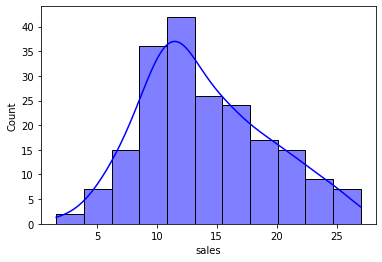

In [12]:
sns.histplot(data=advert.sales, kde=True, color="blue")

<AxesSubplot:xlabel='TV', ylabel='Count'>

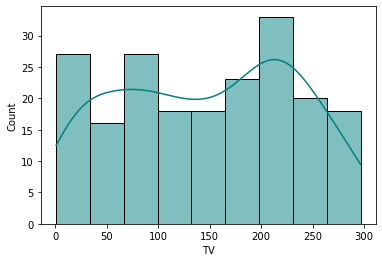

In [13]:
sns.histplot(data=advert.TV, kde=True, color="teal")

<AxesSubplot:xlabel='radio', ylabel='Count'>

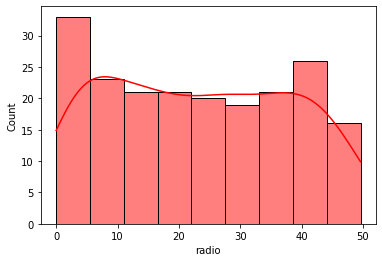

In [14]:
sns.histplot(data=advert.radio, kde=True, color="red")

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

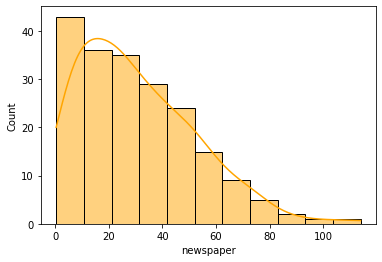

In [15]:
sns.histplot(data=advert.newspaper, kde=True, color="orange")

In [7]:
advert[["TV", "radio", "newspaper", "sales"]].describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Task 4: Univariate Linear Regression - Exploring Relationships between Predictors & Response

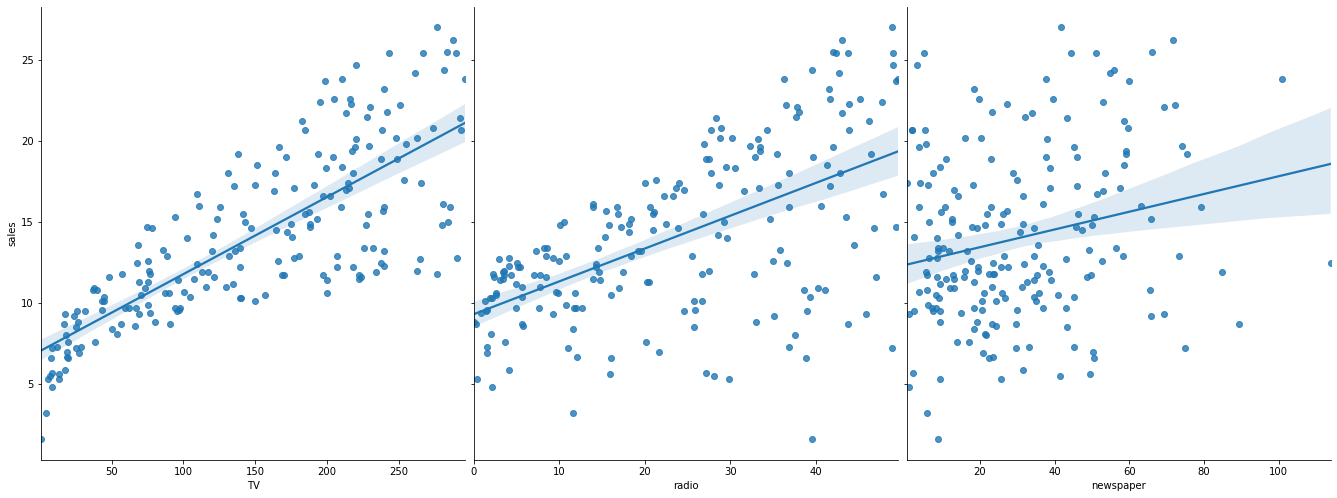

In [16]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.9, kind='reg', diag_kind=None)

In [18]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

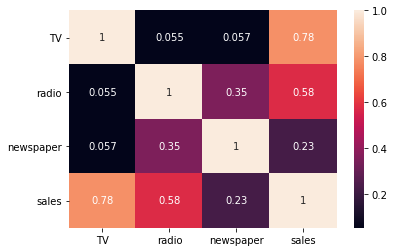

In [19]:
sns.heatmap(advert.corr(), annot=True)

In [21]:
r = advert.TV.corr(advert.sales)
print(r)

0.7822244248616064


In [23]:
r_2 = r**2
print(r_2)

0.6118750508500709


In [24]:
print(r_2*100)

61.18750508500709


#### Task 5: Create Univariate Linear Regression Model

In [25]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [26]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [27]:
Y = advert.sales
print(type(Y))
print(Y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)
